<a href="https://colab.research.google.com/github/SoundNandu/AirBnb-Analysis/blob/master/notebooks/Randomforest_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#mount to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import re
import pickle 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score,accuracy_score

In [0]:
df = pd.read_csv("/content/drive/Shared drives/Mine/classification/data/shuffled-full-set-hashed.csv", header=None, names=['label','words'])

In [0]:
df.head()

,label,words
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...


In [0]:
print("Before dropping NAs, we had",df.shape[0]," rows of data");
df.dropna(inplace=True)
print("After dropping NAs, we have", df.shape[0]," rows of data\n");

Before dropping NAs, we had 62204  rows of data
After dropping NAs, we have 62159  rows of data



In [0]:
print(df.shape)
print(df.columns.values)

(62159, 2)
['label' 'words']


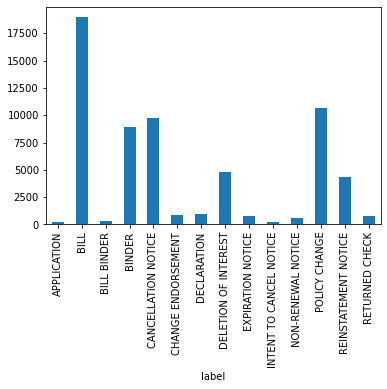

In [0]:
df.groupby('label').words.count().plot.bar(ylim=0)
plt.show()

In [0]:
vectorizer = TfidfVectorizer(max_features=10000)
final_features = vectorizer.fit_transform(df['words']).toarray()
final_features.shape

(62159, 10000)

# Model

In [0]:
# this block is to split the dataset into training and testing set 
X = df['words']
Y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# instead of doing these steps one at a time, we can use a pipeline to complete then all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])

# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('/content/drive/Shared drives/Mine/classification/models/RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)

ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

                         precision    recall  f1-score   support

            APPLICATION       0.89      0.33      0.48        52
                   BILL       0.90      0.90      0.90      4790
            BILL BINDER       0.42      0.17      0.24        66
                 BINDER       0.83      0.90      0.86      2141
    CANCELLATION NOTICE       0.85      0.87      0.86      2497
     CHANGE ENDORSEMENT       0.88      0.72      0.79       230
            DECLARATION       0.41      0.14      0.21       272
   DELETION OF INTEREST       0.93      0.91      0.92      1222
      EXPIRATION NOTICE       0.89      0.71      0.79       201
INTENT TO CANCEL NOTICE       0.83      0.54      0.65        63
     NON-RENEWAL NOTICE       0.93      0.82      0.87       145
          POLICY CHANGE       0.81      0.88      0.84      2588
   REINSTATEMENT NOTICE       0.94      0.94      0.94      1081
         RETURNED CHECK       0.98      0.88      0.93       192

               accuracy

In [0]:


print('Accuracy:', model.score(X_test, y_test))


Accuracy: 0.8689832689832689
